# **RBM**

In [26]:
import numpy as np
import matplotlib.pyplot as plt

class RBM:
    def __init__(self, num_visible, num_hidden):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.W = np.random.randn(num_visible, num_hidden)
        self.b = np.zeros(num_hidden)
        self.a = np.zeros(num_visible)

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def gibbs_sampling(self, v, k):
        for _ in range(k):
            h = self.sigmoid(np.dot(v, self.W) + self.b)
            h_sample = np.random.binomial(1, h)
            v = self.sigmoid(np.dot(h_sample, self.W.T) + self.a)
            v_sample = np.random.binomial(1, v)
        return v, h

    def compute_reconstruction_error(self, data):
        reconstructed_data = self.sigmoid(np.dot(self.sigmoid(np.dot(data, self.W) + self.b), self.W.T) + self.a)
        error = np.mean(np.square(data - reconstructed_data))
        return error


    def train(self, data, learning_rate, k, epochs, batch_size):
        num_batches = len(data) // batch_size
        costs = []

        for epoch in range(epochs):
            np.random.shuffle(data)
            for batch_idx in range(num_batches):
                batch_data = data[batch_idx * batch_size : (batch_idx + 1) * batch_size]

                pos_associations_batch = np.zeros_like(self.W)
                neg_associations_batch = np.zeros_like(self.W)
                a_diff_batch = np.zeros_like(self.a)
                b_diff_batch = np.zeros_like(self.b)

                for v in batch_data:
                    v_sample = np.copy(v)
                    v_k, h_k = self.gibbs_sampling(v_sample, k)

                    pos_associations_batch += np.outer(v, self.sigmoid(np.dot(v, self.W) + self.b))
                    neg_associations_batch += np.outer(v_k, self.sigmoid(np.dot(v_k, self.W) + self.b))
                    a_diff_batch += (v - v_k)
                    b_diff_batch += (self.sigmoid(np.dot(v, self.W) + self.b) - self.sigmoid(np.dot(v_k, self.W) + self.b))

                self.W += learning_rate * (pos_associations_batch - neg_associations_batch) / batch_size
                self.a += learning_rate * a_diff_batch / batch_size
                self.b += learning_rate * b_diff_batch / batch_size

            cost = self.compute_reconstruction_error(data)
            costs.append(cost)
            print(f"Epoch {epoch + 1}, Reconstruction Error: {cost}, Weight: {self.W[0][0]}, Visible Bias: {self.a[0]}, Hidden Bias: {self.b[0]}")

        return costs


seed = 10
np.random.seed(seed)
data = np.random.binomial(1, 0.5, size=(100, 20))

num_visible = data.shape[1]
num_hidden = 20
learning_rate = 0.008
k = 1
epochs = 500
batch_size = 5


rbm = RBM(num_visible, num_hidden)
costs = rbm.train(data, learning_rate, k, epochs, batch_size)





Epoch 1, Reconstruction Error: 0.2246957340668498, Weight: 1.3575055104069969, Visible Bias: -0.042392033639737065, Hidden Bias: -0.05997199526764409
Epoch 2, Reconstruction Error: 0.2032873245525404, Weight: 1.315000468980008, Visible Bias: -0.07276681086289846, Hidden Bias: -0.11144013785180229
Epoch 3, Reconstruction Error: 0.18735209734616107, Weight: 1.2825214400219147, Visible Bias: -0.1007404408476557, Hidden Bias: -0.1490324101654216
Epoch 4, Reconstruction Error: 0.1747000381803342, Weight: 1.2622605206667985, Visible Bias: -0.11580961045420558, Hidden Bias: -0.17622563075062894
Epoch 5, Reconstruction Error: 0.1640776169560706, Weight: 1.2451226468396108, Visible Bias: -0.1345676015627563, Hidden Bias: -0.1954554657013269
Epoch 6, Reconstruction Error: 0.15569529567015866, Weight: 1.2337859747355127, Visible Bias: -0.1478221266445831, Hidden Bias: -0.2089513298060225
Epoch 7, Reconstruction Error: 0.1487158137561462, Weight: 1.222437969681194, Visible Bias: -0.158964924030878

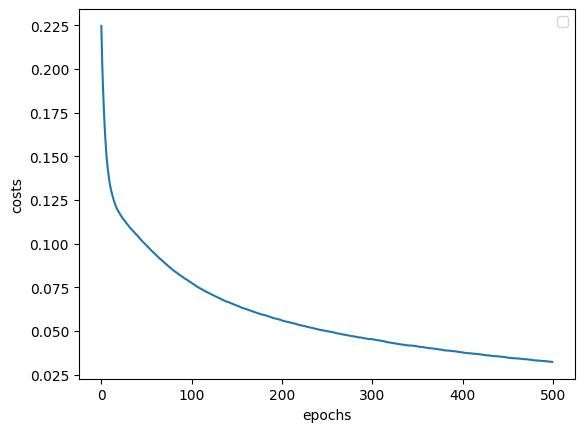

In [27]:
costs = np.array(costs)
plt.plot(costs)
plt.xlabel("epochs")
plt.ylabel("costs")
plt.legend()
plt.show()

In [28]:
new = np.matmul(data,rbm.W.T) + rbm.a
new

array([[-2.3363742 ,  1.97899664,  1.21622729, ...,  4.75986297,
         2.64749099, -4.83646336],
       [-4.64727137, -4.76899378, -0.15397917, ...,  1.87712239,
        -2.67776063,  5.69950913],
       [ 4.55146222, -1.58476666,  0.97260201, ..., -0.82481091,
         0.01295652,  0.11351017],
       ...,
       [-8.191796  , -3.32328003, -0.03398966, ...,  6.67930036,
         0.06991345, -0.19167149],
       [-1.93528307, -3.10930134, -2.62713074, ..., -2.70566284,
         1.92546838, -0.98712985],
       [-0.9441783 , -5.21202616, -2.86626425, ...,  3.36973345,
        -0.5622468 , -7.60078754]])

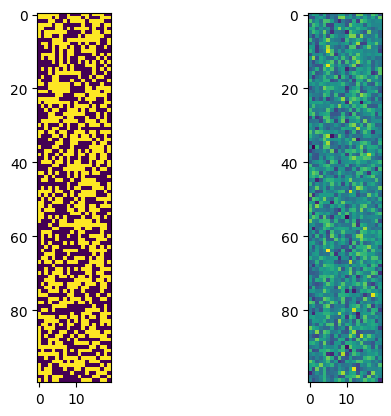

In [29]:
plt.subplot(1,2,1)
plt.imshow(data)
plt.subplot(1,2,2)
plt.imshow(new)


In [30]:
 weight = rbm.W[0][0]
 visible_bias =  rbm.a[0]
 trained_data = weight*data + visible_bias



In [31]:
data,trained_data

(array([[1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 0],
        [0, 0, 1, ..., 0, 0, 1],
        [1, 0, 1, ..., 1, 1, 0]]),
 array([[ 0.93315195,  0.93315195,  0.93315195, ...,  0.93315195,
         -0.50059134, -0.50059134],
        [ 0.93315195,  0.93315195,  0.93315195, ...,  0.93315195,
          0.93315195,  0.93315195],
        [-0.50059134, -0.50059134, -0.50059134, ...,  0.93315195,
         -0.50059134, -0.50059134],
        ...,
        [ 0.93315195,  0.93315195,  0.93315195, ...,  0.93315195,
          0.93315195, -0.50059134],
        [-0.50059134, -0.50059134,  0.93315195, ..., -0.50059134,
         -0.50059134,  0.93315195],
        [ 0.93315195, -0.50059134,  0.93315195, ...,  0.93315195,
          0.93315195, -0.50059134]]))

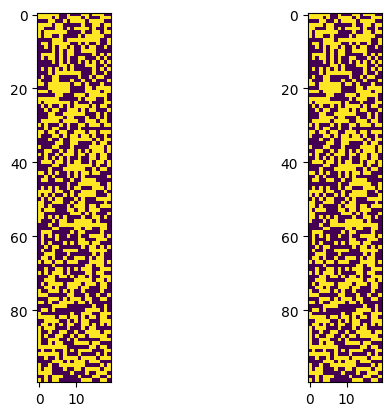

In [32]:
plt.subplot(1,2,1)
plt.imshow(data)
plt.subplot(1,2,2)
plt.imshow(trained_data)

